# Ev Fiyat Tahmini Projesi (Lojistik Regresyon)

Bu Jupyter Notebook, Türkiye'deki ev fiyatlarını tahmin etmek için Lojistik Regresyon modelini kullanmaktadır. Proje, veri analizi, görselleştirme, model oluşturma ve değerlendirme adımlarını içermektedir.

## 1. Veri Yükleme ve Keşifsel Veri Analizi (EDA)

In [202]:
# Gerekli kütüphaneleri yükle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [203]:
# Türkçe karakterler için font ayarı
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
# CSV dosyasını oku
df = pd.read_csv('processed_turkish_house_sales.csv')
print(f"Veri seti boyutu: {df.shape}")
df.head(10)

Veri seti boyutu: (15276, 8)


,satici_tip,Metrekare,Oda_Sayisi,il,Ilce,Mahalle,Tarih,fiyat
0,Sahibinden,160.00,3.5+1,Istanbul,Şişli,Esentepe,25 Mayıs 2025,8750000
1,Sahibinden,85.00,2+1,Istanbul,Kartal,Topselvi,25 Mayıs 2025,4899000
2,Sahibinden,110.00,3+1,Istanbul,Tuzla,Aydınlı,24 Mayıs 2025,5900000
3,Sahibinden,200.00,6+1,Istanbul,Sultanbeyli,Necipfazıl,24 Mayıs 2025,6999999
4,Sahibinden,120.00,2+1,Istanbul,Esenyurt,Bilinmiyor,24 Mayıs 2025,1625000
5,Sahibinden,95.00,2+1,Istanbul,Kağıthane,Bilinmiyor,24 Mayıs 2025,5850000
6,Sahibinden,175.00,3.5+1,Istanbul,Başakşehir,Bahçeşehir,24 Mayıs 2025,10600000
7,Sahibinden,210.00,5+1,Istanbul,Fatih,Kocamustafapaşa,24 Mayıs 2025,6750000
8,Sahibinden,100.00,2+1,Istanbul,Esenyurt,Haramidere,24 Mayıs 2025,1175000
9,Sahibinden,100.00,2+1,Istanbul,Esenyurt,Bilinmiyor,24 Mayıs 2025,1059000


In [204]:
print("\nEksik değerler:")
print(df.isnull().sum())


Eksik değerler:
satici_tip    0
Metrekare     0
Oda_Sayisi    0
il            0
Ilce          0
Mahalle       0
Tarih         0
fiyat         0
dtype: int64


In [205]:
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

satici_tip: object
Metrekare: float64
Oda_Sayisi: object
il: object
Ilce: object
Mahalle: object
Tarih: object
fiyat: int64


In [206]:
df = df.drop(columns=["Tarih"])

In [207]:
print("\nKategorik sütunlar için benzersiz değerler:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} benzersiz değer")
    if df[col].nunique() < 20:
        print(f"  Değerler: {df[col].unique()}")
    print()


Kategorik sütunlar için benzersiz değerler:
satici_tip: 2 benzersiz değer
  Değerler: ['Sahibinden' 'Emlak-ofisinden']

Oda_Sayisi: 30 benzersiz değer

il: 23 benzersiz değer

Ilce: 193 benzersiz değer

Mahalle: 314 benzersiz değer



## 2. Veri Görselleştirme

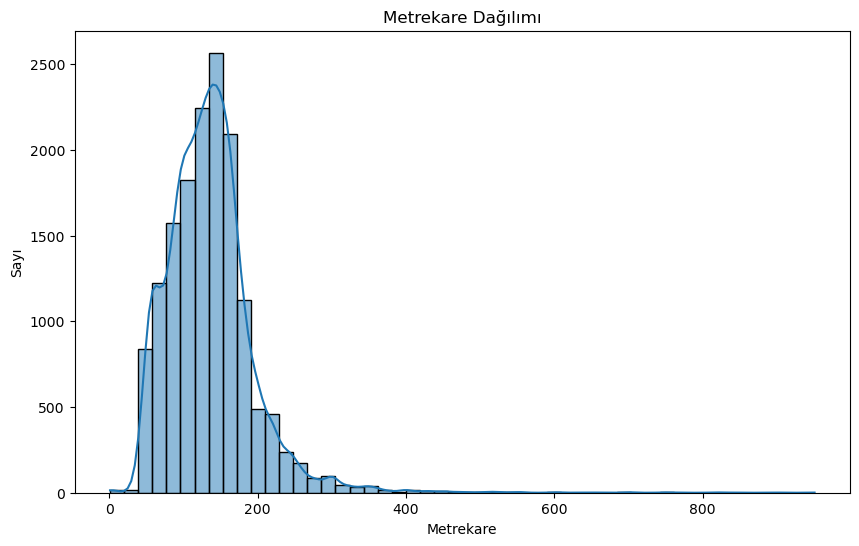

In [208]:
# 1. Metrekare dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df["Metrekare"], bins=50, kde=True)
plt.title("Metrekare Dağılımı")
plt.xlabel("Metrekare")
plt.ylabel("Sayı")
plt.savefig("metrekare_dagilimi.png", dpi=300, bbox_inches='tight')
plt.show()

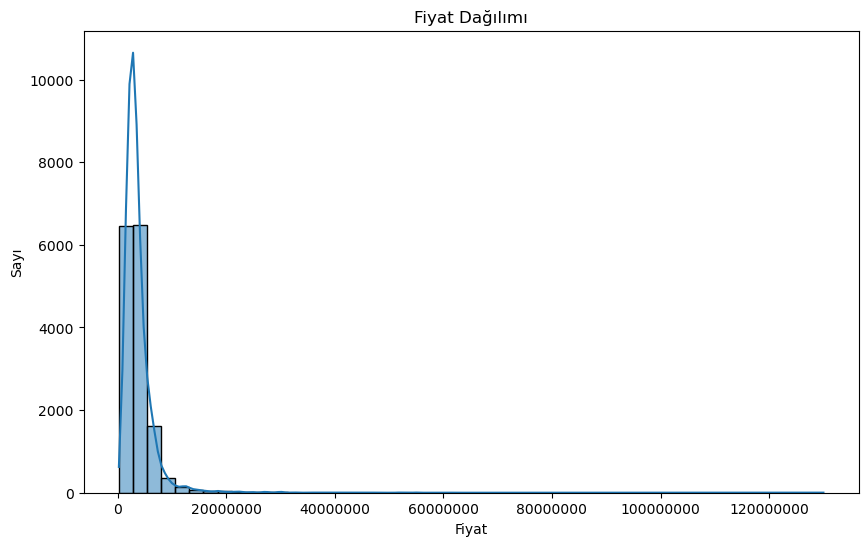

In [209]:
# 2. Fiyat dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df["fiyat"], bins=50, kde=True)
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Sayı")
plt.ticklabel_format(style='plain', axis='x')
plt.savefig("fiyat_dagilimi.png", dpi=300, bbox_inches='tight')
plt.show()

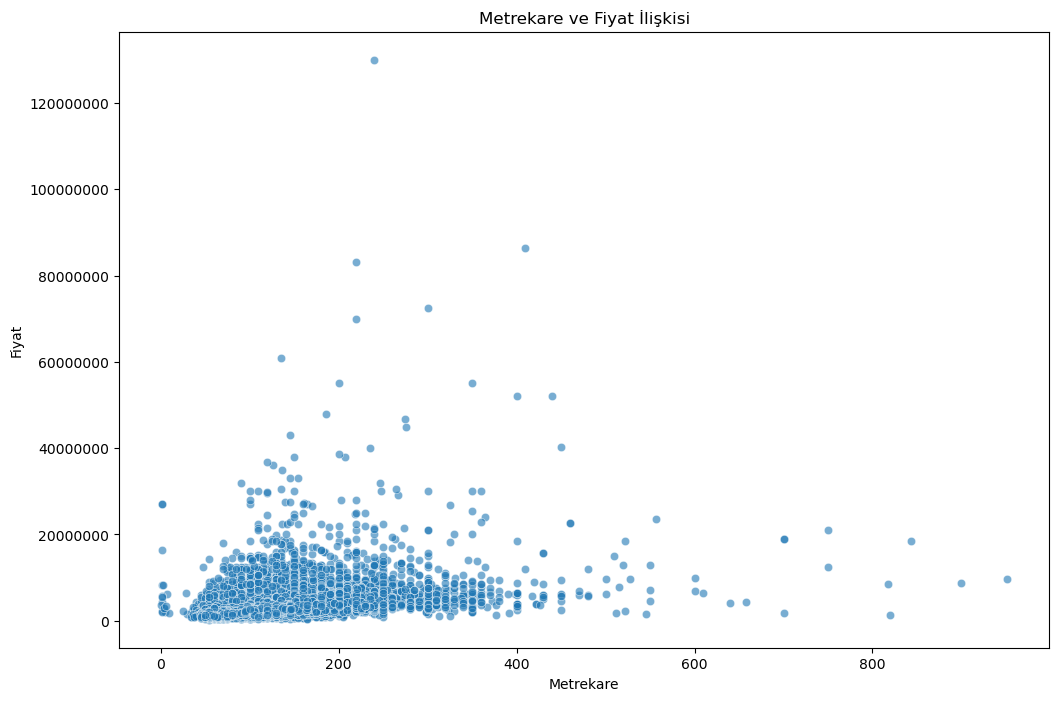

In [210]:
# 3. Metrekare ve Fiyat arasındaki ilişki (Serpilme Grafiği)
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Metrekare", y="fiyat", data=df, alpha=0.6)
plt.title("Metrekare ve Fiyat İlişkisi")
plt.xlabel("Metrekare")
plt.ylabel("Fiyat")
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("metrekare_fiyat_iliskisi.png", dpi=300, bbox_inches='tight')
plt.show()

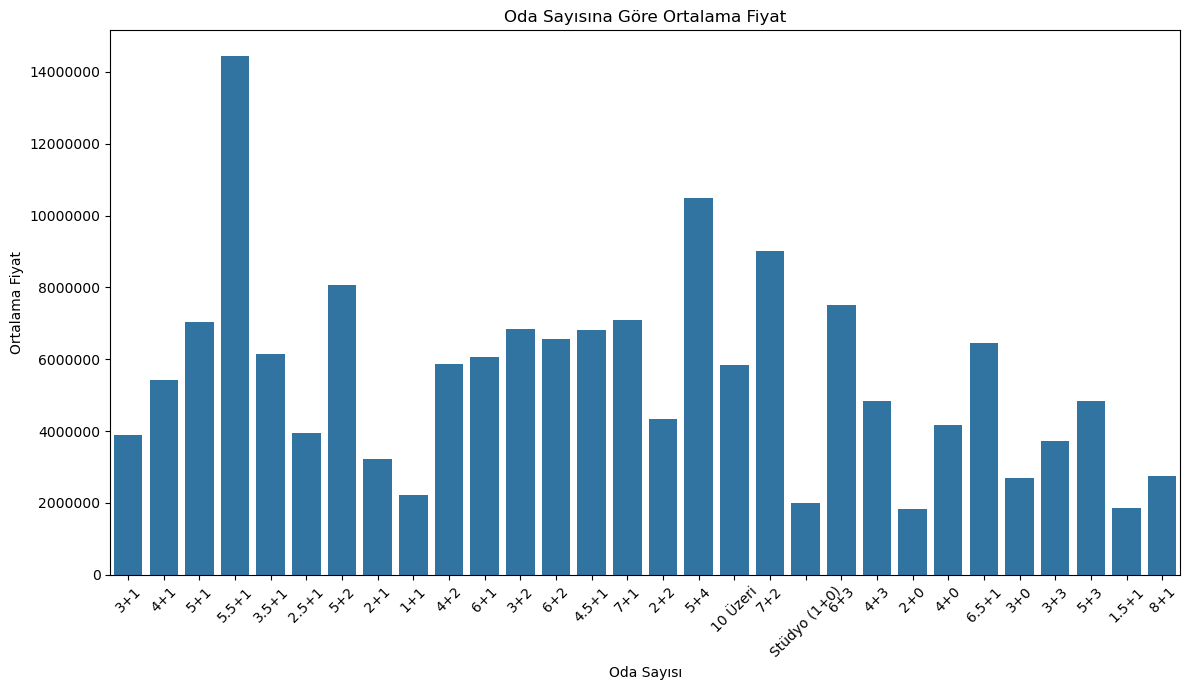

In [211]:
# 4. Oda Sayısı ve Ortalama Fiyat
plt.figure(figsize=(12, 7))
sns.barplot(x="Oda_Sayisi", y="fiyat", data=df.sort_values(by='fiyat', ascending=False), ci=None)
plt.title("Oda Sayısına Göre Ortalama Fiyat")
plt.xlabel("Oda Sayısı")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig("oda_sayisi_ortalama_fiyat.png", dpi=300, bbox_inches='tight')
plt.show()

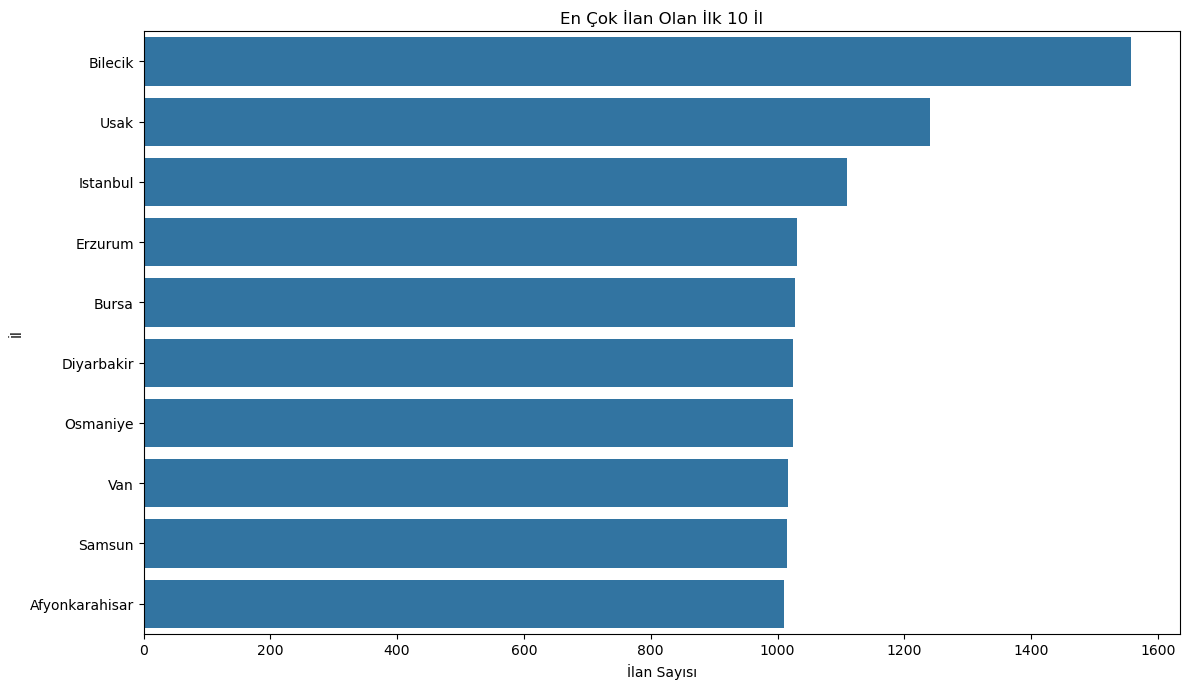

In [212]:
# 5. En çok ilan olan iller
plt.figure(figsize=(12, 7))
sns.countplot(y="il", data=df, order=df["il"].value_counts().index[:10])
plt.title("En Çok İlan Olan İlk 10 İl")
plt.xlabel("İlan Sayısı")
plt.ylabel("İl")
plt.tight_layout()
plt.savefig("en_cok_ilan_olan_iller.png", dpi=300, bbox_inches='tight')
plt.show()

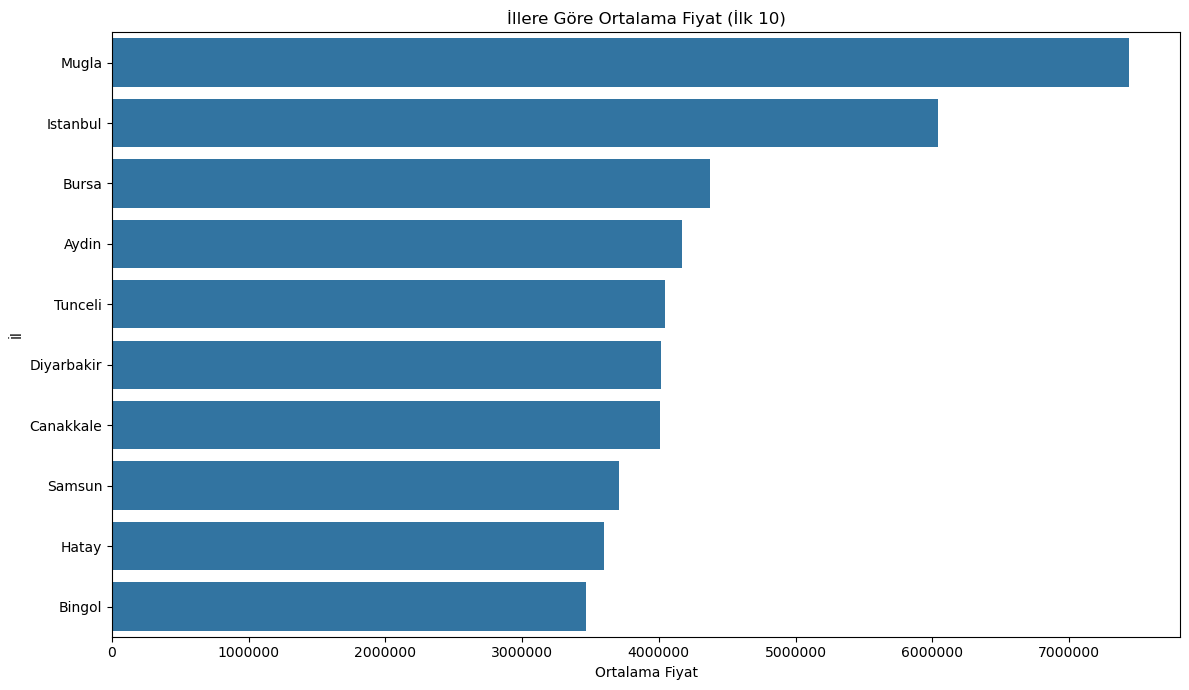

In [213]:
# 6. İllere göre ortalama fiyat
plt.figure(figsize=(12, 7))
sns.barplot(y="il", x="fiyat", data=df.groupby("il")["fiyat"].mean().sort_values(ascending=False).head(10).reset_index())
plt.title("İllere Göre Ortalama Fiyat (İlk 10)")
plt.xlabel("Ortalama Fiyat")
plt.ylabel("İl")
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.savefig("illere_gore_ortalama_fiyat.png", dpi=300, bbox_inches='tight')
plt.show()

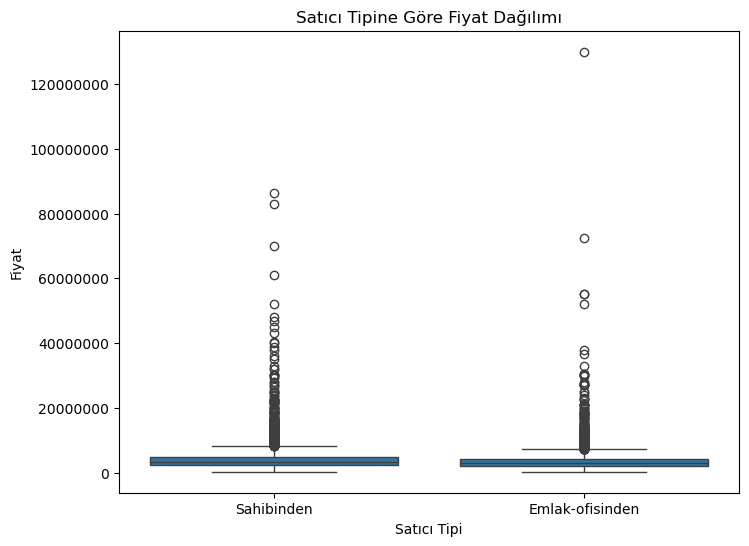

In [214]:
# 7. Satıcı Tipine Göre Fiyat Dağılımı
plt.figure(figsize=(8, 6))
sns.boxplot(x="satici_tip", y="fiyat", data=df)
plt.title("Satıcı Tipine Göre Fiyat Dağılımı")
plt.xlabel("Satıcı Tipi")
plt.ylabel("Fiyat")
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("satici_tipi_fiyat_dagilimi.png", dpi=300, bbox_inches='tight')
plt.show()

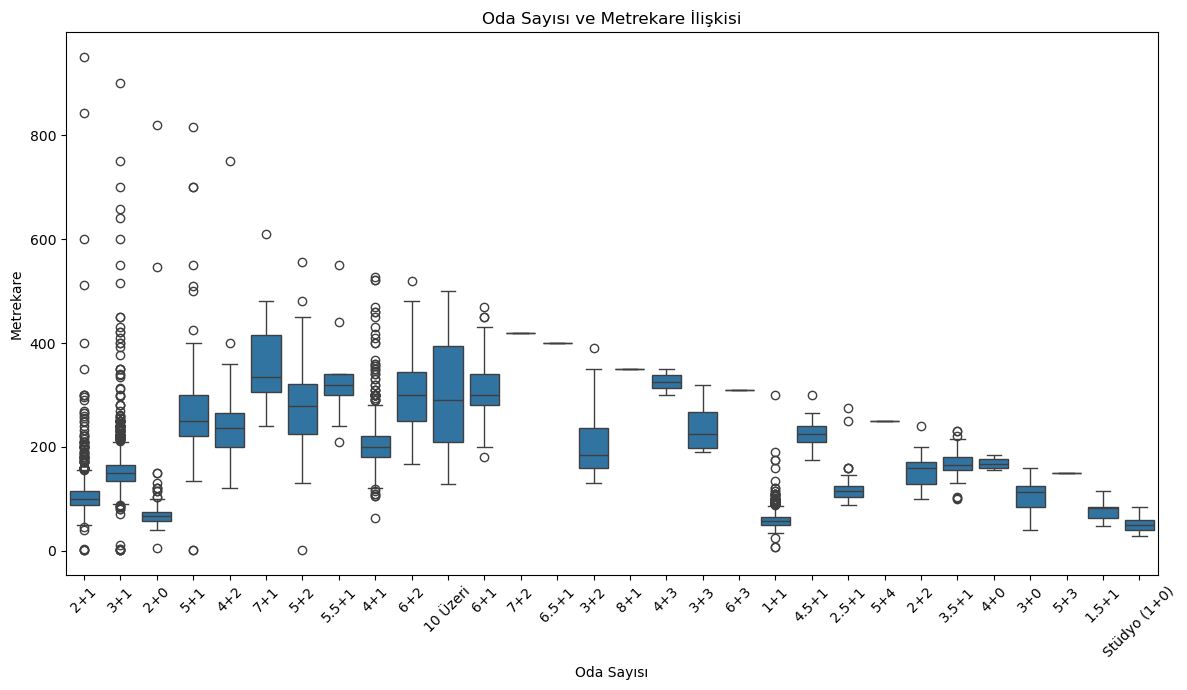

In [215]:
# 8. Oda Sayısı ve Metrekare İlişkisi
plt.figure(figsize=(12, 7))
sns.boxplot(x="Oda_Sayisi", y="Metrekare", data=df.sort_values(by='Metrekare', ascending=False))
plt.title("Oda Sayısı ve Metrekare İlişkisi")
plt.xlabel("Oda Sayısı")
plt.ylabel("Metrekare")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("oda_sayisi_metrekare_iliskisi.png", dpi=300, bbox_inches='tight')
plt.show()


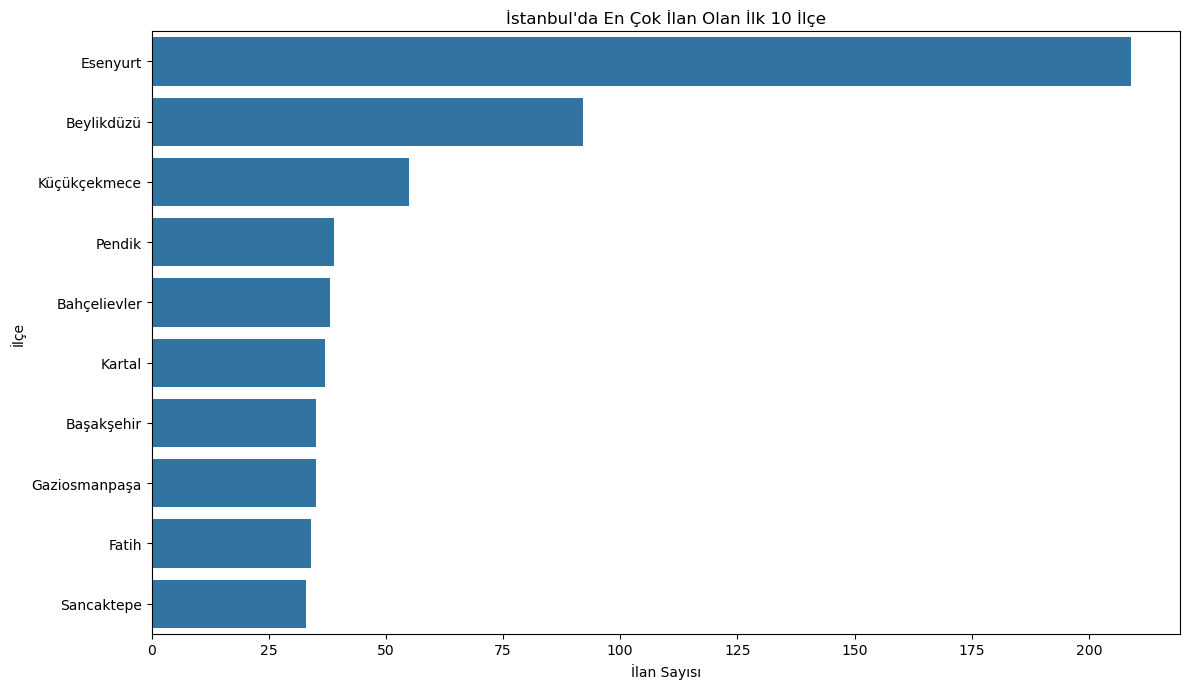

In [216]:
# 9. En çok ilan olan ilçeler (İstanbul için)
istanbul_df = df[df["il"] == "Istanbul"]
plt.figure(figsize=(12, 7))
sns.countplot(y="Ilce", data=istanbul_df, order=istanbul_df["Ilce"].value_counts().index[:10])
plt.title("İstanbul'da En Çok İlan Olan İlk 10 İlçe")
plt.xlabel("İlan Sayısı")
plt.ylabel("İlçe")
plt.tight_layout()
plt.savefig("istanbul_en_cok_ilan_olan_ilceler.png", dpi=300, bbox_inches='tight')
plt.show()

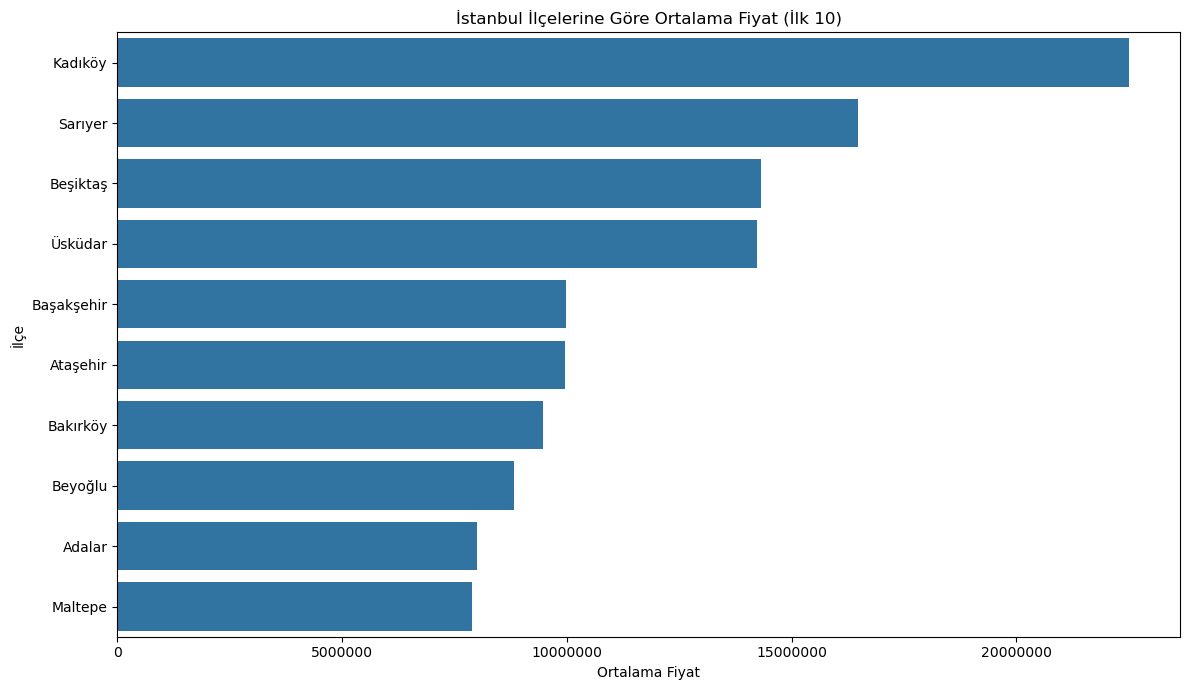

In [217]:
# 10. İstanbul ilçelerine göre ortalama fiyat
plt.figure(figsize=(12, 7))
sns.barplot(y="Ilce", x="fiyat", data=istanbul_df.groupby("Ilce")["fiyat"].mean().sort_values(ascending=False).head(10).reset_index())
plt.title("İstanbul İlçelerine Göre Ortalama Fiyat (İlk 10)")
plt.xlabel("Ortalama Fiyat")
plt.ylabel("İlçe")
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.savefig("istanbul_ilcelere_gore_ortalama_fiyat.png", dpi=300, bbox_inches='tight')
plt.show()

## 3. Veri Ön İşleme ve Model Oluşturma

📈 R² Skoru: 0.430
Ortalama Mutlak Hata (MAE): 979,332 TL


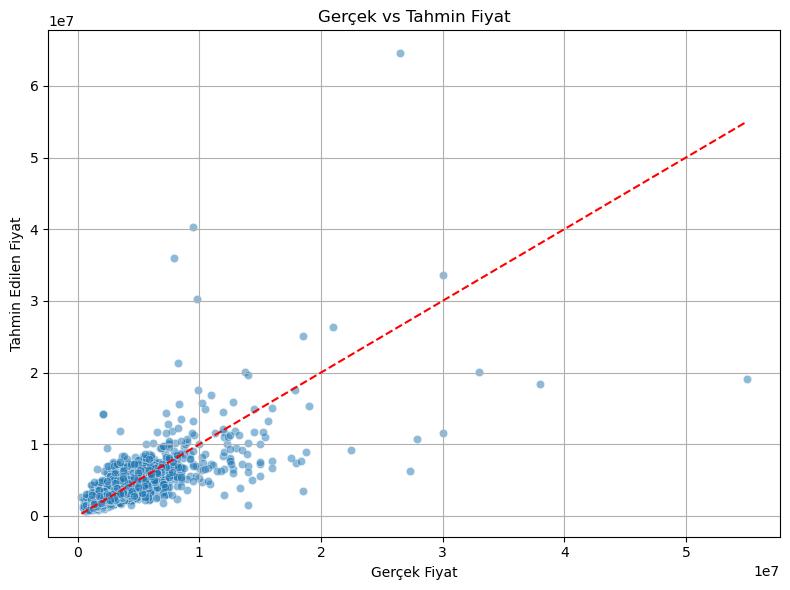

In [218]:
def parse_oda_sayisi(oda_str):
    try:
        return sum([float(x) for x in str(oda_str).split("+")])
    except:
        return None

df["Oda_Sayisi"] = df["Oda_Sayisi"].apply(parse_oda_sayisi)

#  Eksik verileri temizle
df.dropna(subset=["Metrekare", "Oda_Sayisi", "il", "Ilce", "fiyat"], inplace=True)

#  Özellikleri ve hedef değişkeni seç
X = df[["Metrekare", "Oda_Sayisi", "il", "Ilce", "Mahalle", "satici_tip"]]
y = df["fiyat"]

#  Kategorik değişkenleri sayısallaştır
X = pd.get_dummies(X, columns=["il", "Ilce", "Mahalle", "satici_tip"], drop_first=True)

#  Eğitim/test ayırımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Sadece sayısal kolonları ölçekle
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[["Metrekare", "Oda_Sayisi"]] = scaler.fit_transform(X_train[["Metrekare", "Oda_Sayisi"]])
X_test_scaled[["Metrekare", "Oda_Sayisi"]] = scaler.transform(X_test[["Metrekare", "Oda_Sayisi"]])

#  Modeli oluştur ve eğit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

#  Tahmin yap
y_pred = model.predict(X_test_scaled)

#  Değerlendirme
print(f"📈 R² Skoru: {r2_score(y_test, y_pred):.3f}")
print(f"Ortalama Mutlak Hata (MAE): {mean_absolute_error(y_test, y_pred):,.0f} TL")

#  Gerçek vs Tahmin grafiği
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x çizgisi
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Fiyat")
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Model Değerlendirme ve Görselleştirme

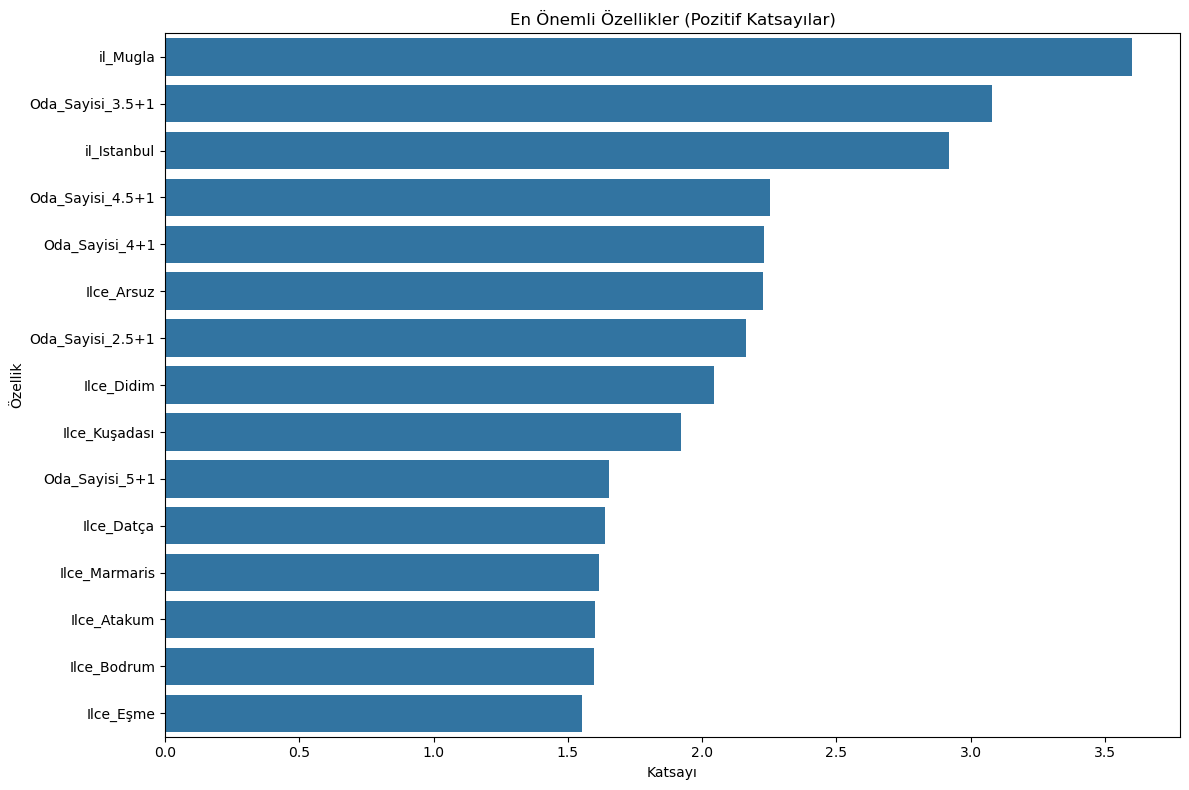

In [219]:
# 12. Feature Importance
plt.figure(figsize=(12, 8))
top_features = coefficients.head(15)
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('En Önemli Özellikler (Pozitif Katsayılar)')
plt.xlabel('Katsayı')
plt.ylabel('Özellik')
plt.tight_layout()
plt.savefig("feature_importance_positive.png", dpi=300, bbox_inches='tight')
plt.show()


Toplam 576 adet outlier bulundu.


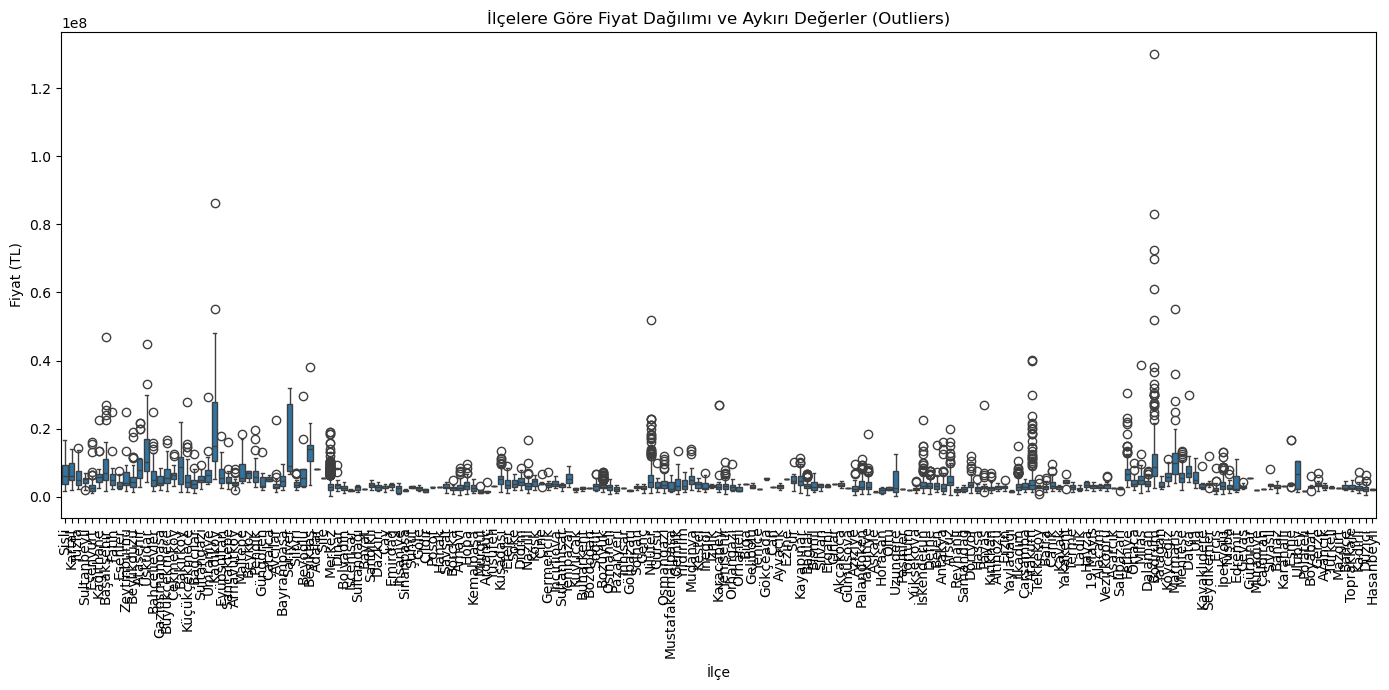

In [220]:
# 🛠️ 1. Fonksiyon: her ilçe için fiyat outlierlarını bul
def find_outliers_by_ilce(df):
    outlier_indices = []

    for ilce, group in df.groupby("Ilce"):
        q1 = group["fiyat"].quantile(0.25)
        q3 = group["fiyat"].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = group[(group["fiyat"] < lower_bound) | (group["fiyat"] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())
    return outlier_indices
#  2. Outlier indekslerini bul ve temizle
outlier_idx = find_outliers_by_ilce(df)
print(f"Toplam {len(outlier_idx)} adet outlier bulundu.")

# 🧹 3. Temizlenmiş DataFrame
df_cleaned = df.drop(index=outlier_idx)
# 📊 4. Tüm ilçeler için fiyat boxplot'u
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x="Ilce", y="fiyat", showfliers=True)  # showfliers=True → uç değerleri göster
plt.xticks(rotation=90)
plt.title("İlçelere Göre Fiyat Dağılımı ve Aykırı Değerler (Outliers)")
plt.ylabel("Fiyat (TL)")
plt.xlabel("İlçe")
plt.tight_layout()
plt.show()


In [221]:
def fill_outliers_with_median_strict(df, iqr_multiplier=0.5):
    for ilce, group in df.groupby("Ilce"):
        q1 = group["fiyat"].quantile(0.25)
        q3 = group["fiyat"].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr_multiplier * iqr
        upper_bound = q3 + iqr_multiplier * iqr
        median_value = group["fiyat"].median()

        outliers_condition = (df["Ilce"] == ilce) & ((df["fiyat"] < lower_bound) | (df["fiyat"] > upper_bound))
        df.loc[outliers_condition, "fiyat"] = median_value


fill_outliers_with_median_strict(df, iqr_multiplier=0.2)


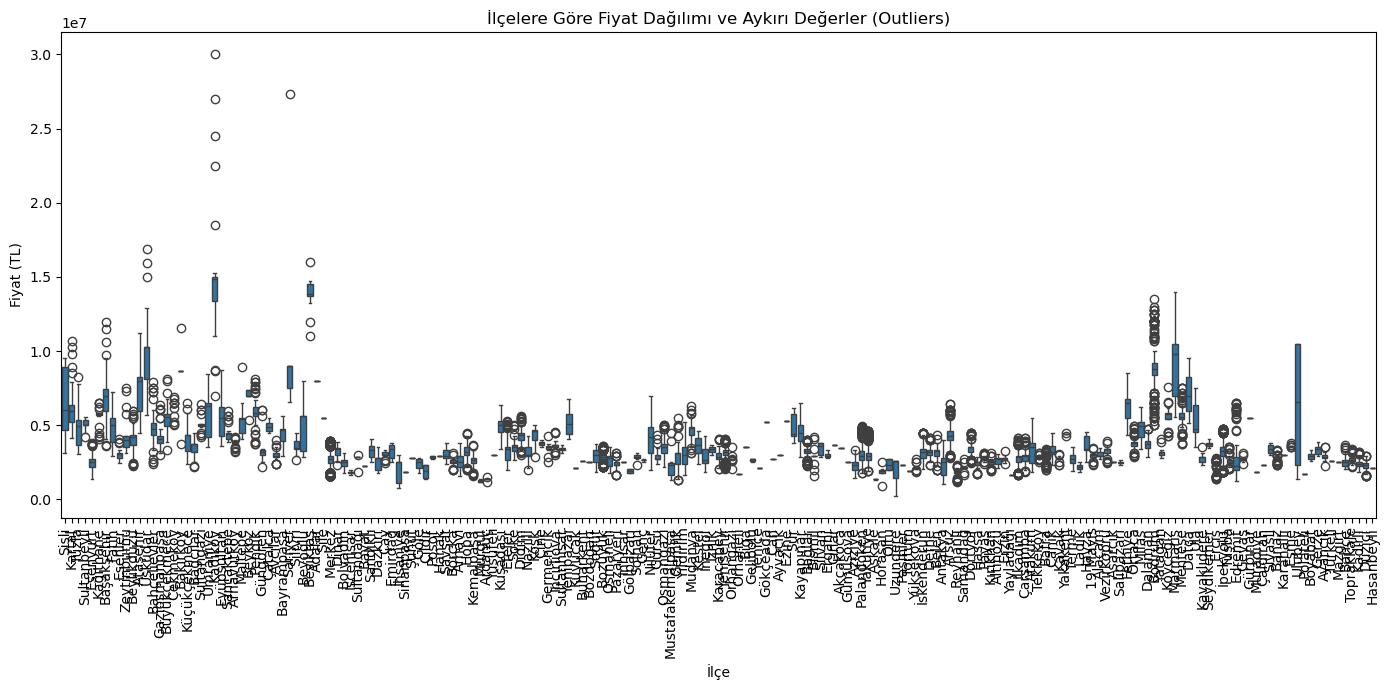

In [222]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x="Ilce", y="fiyat", showfliers=True)  # showfliers=True → uç değerleri göster
plt.xticks(rotation=90)
plt.title("İlçelere Göre Fiyat Dağılımı ve Aykırı Değerler (Outliers)")
plt.ylabel("Fiyat (TL)")
plt.xlabel("İlçe")
plt.tight_layout()
plt.show()

📈 R² Skoru: 0.756
Ortalama Mutlak Hata (MAE): 482,305 TL


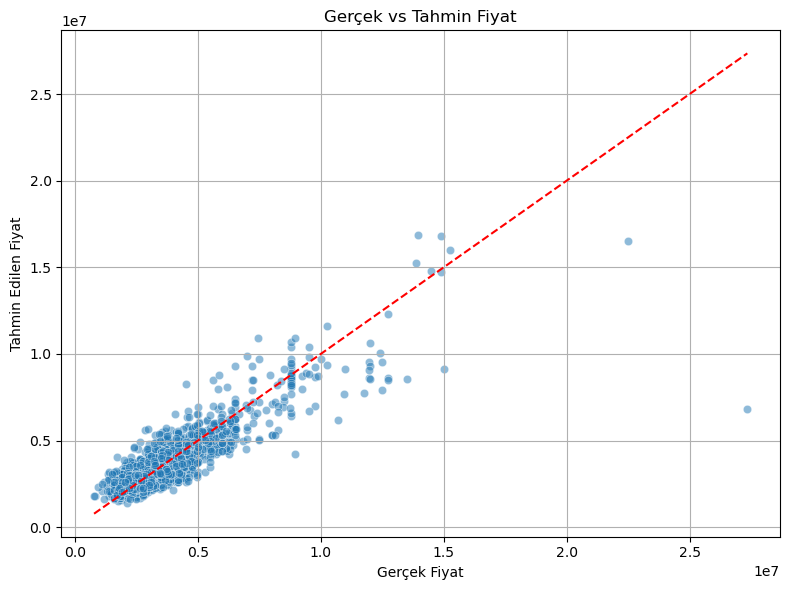

In [223]:
#  Oda sayısını sayısala çevir (örn: "2+1" → 3.0)
def parse_oda_sayisi(oda_str):
    try:
        return sum([float(x) for x in str(oda_str).split("+")])
    except:
        return None

df["Oda_Sayisi"] = df["Oda_Sayisi"].apply(parse_oda_sayisi)

#  Eksik verileri temizle
df.dropna(subset=["Metrekare", "Oda_Sayisi", "il", "Ilce", "fiyat"], inplace=True)

#  Özellikleri ve hedef değişkeni seç
X = df[["Metrekare", "Oda_Sayisi", "il", "Ilce", "Mahalle", "satici_tip"]]
y = df["fiyat"]

#  Kategorik değişkenleri sayısallaştır
X = pd.get_dummies(X, columns=["il", "Ilce", "Mahalle", "satici_tip"], drop_first=True)

#  Eğitim/test ayırımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Sadece sayısal kolonları ölçekle
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[["Metrekare", "Oda_Sayisi"]] = scaler.fit_transform(X_train[["Metrekare", "Oda_Sayisi"]])
X_test_scaled[["Metrekare", "Oda_Sayisi"]] = scaler.transform(X_test[["Metrekare", "Oda_Sayisi"]])

#  Modeli oluştur ve eğit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

#  Tahmin yap
y_pred = model.predict(X_test_scaled)


print(f"📈 R² Skoru: {r2_score(y_test, y_pred):.3f}")
from sklearn.metrics import mean_absolute_error
print(f"Ortalama Mutlak Hata (MAE): {mean_absolute_error(y_test, y_pred):,.0f} TL")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x çizgisi
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Fiyat")
plt.grid(True)
plt.tight_layout()
plt.show()


In [226]:
def tahmin_yap(model, scaler, columns):
    print("Lütfen konut bilgilerini girin.")
    

    satici_tip = "Sahibinden"
    
    il = input("İl giriniz (örnek: Istanbul): ").strip()
    ilce = input("İlçe giriniz (örnek: Kadikoy) — boş bırakabilirsiniz:").strip()
    mahalle = input("Mahalle giriniz (örnek: Suadiye) — boş bırakabilirsiniz:: ").strip()
    
    while True:
        try:
            metrekare = float(input("Metrekare: "))
            break
        except:
            print("Geçerli bir sayı giriniz.")
    
    while True:
        try:
            oda_sayisi = float(input("Oda Sayısı: "))
            break
        except:
            print("Geçerli bir sayı giriniz.")
    
    new_data = pd.DataFrame({
        "satici_tip": [satici_tip],
        "Metrekare": [metrekare],
        "Oda_Sayisi": [oda_sayisi],
        "il": [il],
        "Ilce": [ilce if ilce else None],
        "Mahalle": [mahalle if mahalle else None]
    })
    
    new_data_encoded = pd.get_dummies(new_data, columns=["il", "Ilce", "Mahalle", "satici_tip"], drop_first=True)
    
    for col in columns:
        if col not in new_data_encoded.columns:
            new_data_encoded[col] = 0
    new_data_encoded = new_data_encoded[columns]
    
    new_data_encoded[["Metrekare", "Oda_Sayisi"]] = scaler.transform(new_data_encoded[["Metrekare", "Oda_Sayisi"]])
    
    fiyat_tahmin = model.predict(new_data_encoded)[0]
    
    print(f"\nTahmin edilen fiyat: {fiyat_tahmin:,.2f} TL")

tahmin_yap(model, scaler, X_train.columns)

Lütfen konut bilgilerini girin.


İl giriniz (örnek: Istanbul):  Istanbul
İlçe giriniz (örnek: Kadikoy) — boş bırakabilirsiniz: 
Mahalle giriniz (örnek: Suadiye) — boş bırakabilirsiniz::  
Metrekare:  150
Oda Sayısı:  2



Tahmin edilen fiyat: 2,175,021.93 TL
